# 1. K-Means Clustering: Basic Implementation


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Centroids: [[7.33333333 9.        ]
 [1.16666667 1.46666667]]
Labels: [1 1 0 0 1 0]


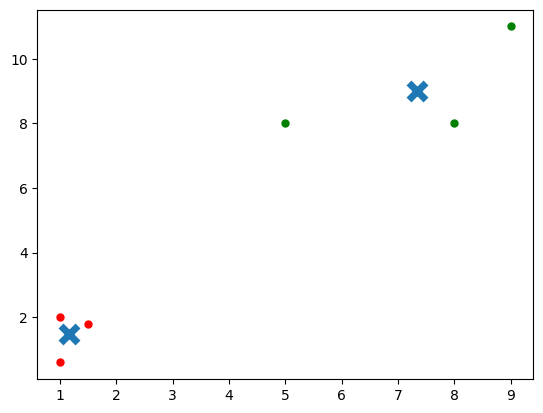

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Example data
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11]
])

# Initialize and fit KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Get the centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:", centroids)
print("Labels:", labels)

# Plotting
colors = ["g.", "r."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()


# 2. K-Means++ Initialization


Centroids: [[7.33333333 9.        ]
 [1.16666667 1.46666667]]
Labels: [1 1 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


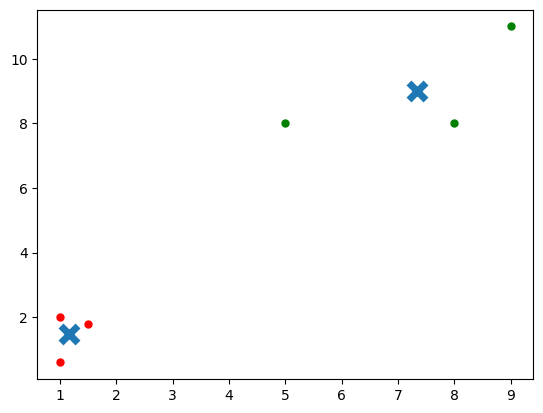

In [3]:
from sklearn.cluster import KMeans
import numpy as np

# Example data
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11]
])

# Initialize and fit KMeans with K-Means++ initialization
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X)

# Get the centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroids:", centroids)
print("Labels:", labels)


# Plotting
colors = ["g.", "r."]
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize=10)

plt.scatter(centroids[:, 0], centroids[:, 1], marker="x", s=150, linewidths=5, zorder=10)
plt.show()

# 3. Batch K-Means Implementation


In [4]:
from sklearn.cluster import MiniBatchKMeans
import numpy as np

# Example data
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11]
])

# Initialize and fit MiniBatchKMeans
batch_kmeans = MiniBatchKMeans(n_clusters=2, batch_size=3)
batch_kmeans.fit(X)

# Get the centroids and labels
centroids = batch_kmeans.cluster_centers_
labels = batch_kmeans.labels_

print("Centroids:", centroids)
print("Labels:", labels)


Centroids: [[7.15384615 8.92307692]
 [1.19642857 1.47142857]]
Labels: [1 1 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


# 4. Custom Implementation of K-Means


In [5]:
import numpy as np

def initialize_centroids(X, k):
    np.random.seed(42)
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:k]]
    return centroids

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Example data
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11]
])

# Running the custom K-Means
centroids, labels = kmeans(X, 2)

print("Centroids:", centroids)
print("Labels:", labels)


Centroids: [[1.16666667 1.46666667]
 [7.33333333 9.        ]]
Labels: [0 0 1 1 0 1]


# 5. Elbow Method to Find Optimal Number of Clusters

In [6]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Example data
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11], [8, 2],
    [10, 2], [9, 3]
])

# Elbow method to determine optimal k
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to closest centroid

# Plotting the Elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

ValueError: n_samples=9 should be >= n_clusters=10.

# 6. Using Different Distance Metrics


In [7]:
from sklearn.metrics.pairwise import manhattan_distances
import numpy as np
import matplotlib.pyplot as plt

# Custom K-Means with Manhattan distance
def assign_clusters_manhattan(X, centroids):
    distances = manhattan_distances(X[:, np.newaxis], centroids)
    return np.argmin(distances, axis=1)

def kmeans_manhattan(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        labels = assign_clusters_manhattan(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Example data
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11]
])

# Running the custom K-Means with Manhattan distance
centroids, labels = kmeans_manhattan(X, 2)

print("Centroids:", centroids)
print("Labels:", labels)


ValueError: Found array with dim 3. check_pairwise_arrays expected <= 2.

# 7. Silhouette Score for Evaluating Clustering Quality


In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Example data
X = np.array([
    [1, 2], [1.5, 1.8], [5, 8],
    [8, 8], [1, 0.6], [9, 11], [8, 2],
    [10, 2], [9, 3]
])

# Fit KMeans and calculate silhouette score
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
labels = kmeans.labels_

# Calculate the Silhouette score
sil_score = silhouette_score(X, labels)

print("Silhouette Score:", sil_score)


Silhouette Score: 0.7036685297515942


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
